# Init & parsing

импорт

In [2]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from application import *
from journal import Journal, JournalASU, jobs_to_df
from pre_processing import Job, Systems, Objects 
import statistics
%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


парсинг файлов

In [3]:
# %%time
jobs = []
jobs.extend(process_files(r'.\input data\SAKE', all_visible_sheets, works_parser.ParserSake))

print(len(jobs))

folder: .\input data\SAKE
 - 7.1.36.xlsx
 - 7.1.37_2.xlsx
 - 7.1.38.xlsx
 - 9.2.36.xlsx
 - 9.2.37-1.xlsx
 - 9.2.37_2.xlsx
 - 9.2.38.xlsx
 - 9.3.36.xlsx
 - 9.3.37-1.xlsx
 - 9.3.37_2.xlsx
 - 9.3.38.xlsx
 - 9.4.36.xlsx
 - 9.4.37-1.xlsx
 - 9.4.37_2.xlsx
 - 9.4.38.xlsx
 - АСУ И_01.2022.xlsx
 - АСУ М_01.2022.xlsx
 - АСУТП_01.2022.xlsx
 - ЛВС_01.2022.xlsx
408


генерация статистики

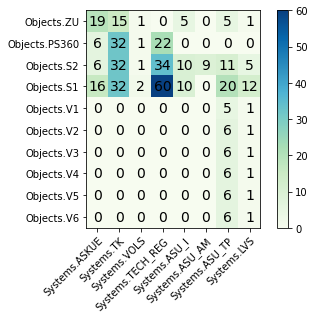

In [4]:
stats = Counter((j.system, j.object)for j in jobs)    
# print(stats)

statistics.visualize_statistics(stats)

# for (xlabel, ylabel), count in stats.items():
#     print(f'{str(xlabel).ljust(17)}, {str(ylabel).ljust(15)} - {str(count).ljust(5)}')

# Tests

date test

In [5]:
dates = set((j.date.year, j.date.month) for j in jobs)
print(dates)
assert len(dates) == 1
print('test complete.')


{(2022, 1)}
test complete.


ASU test

In [6]:
assert stats[(Systems.ASU_TP, Objects.S1)] > 0
assert stats[(Systems.ASU_TP, Objects.S2)] > 0
assert stats[(Systems.ASU_TP, Objects.V1)] > 0
assert stats[(Systems.ASU_TP, Objects.V2)] > 0
assert stats[(Systems.ASU_TP, Objects.V3)] > 0
assert stats[(Systems.ASU_TP, Objects.V4)] > 0
assert stats[(Systems.ASU_TP, Objects.V5)] > 0
assert stats[(Systems.ASU_TP, Objects.V6)] > 0
# assert stats[(Systems.ASU_TP, Objects.ZU)] > 0

assert stats[(Systems.ASU_I, Objects.S1)] > 0
assert stats[(Systems.ASU_I, Objects.S2)] > 0
# assert stats[(Systems.ASU_I, Objects.ZU)] > 0

assert stats[(Systems.ASU_AM, Objects.S2)] > 0

assert stats[(Systems.LVS, Objects.S1)] > 0
assert stats[(Systems.LVS, Objects.S2)] > 0
assert stats[(Systems.LVS, Objects.V1)] > 0
assert stats[(Systems.LVS, Objects.V2)] > 0
assert stats[(Systems.LVS, Objects.V3)] > 0
assert stats[(Systems.LVS, Objects.V4)] > 0
assert stats[(Systems.LVS, Objects.V5)] > 0
assert stats[(Systems.LVS, Objects.V6)] > 0
# assert stats[(Systems.LVS, Objects.ZU)] > 0

print('all ASU/LVS tests is complete')

all ASU/LVS tests is complete


VOLS test

In [7]:
assert stats[(Systems.VOLS, Objects.ZU)] > 0
assert stats[(Systems.VOLS, Objects.PS360)] > 0
assert stats[(Systems.VOLS, Objects.S2)] > 0
assert stats[(Systems.VOLS, Objects.S1)] > 0

print('all VOLS tests is complete')

all VOLS tests is complete


TK test

In [8]:
assert stats[(Systems.TK, Objects.ZU)] > 0
assert stats[(Systems.TK, Objects.PS360)] > 0
assert stats[(Systems.TK, Objects.S2)] > 0
assert stats[(Systems.TK, Objects.S1)] > 0

print('all TK tests is complete')

all TK tests is complete


ASKUE test

In [9]:
assert stats[(Systems.ASKUE, Objects.ZU)] > 0
assert stats[(Systems.ASKUE, Objects.PS360)] > 0
# assert stats[(Systems.ASKUE, Objects.PS223)] > 0
assert stats[(Systems.ASKUE, Objects.S2)] > 0
assert stats[(Systems.ASKUE, Objects.S1)] > 0

print('all ASKUE tests is complete')

all ASKUE tests is complete


TECH_REG test

In [10]:
assert stats[(Systems.TECH_REG, Objects.PS360)] > 0
assert stats[(Systems.TECH_REG, Objects.S2)] > 0
assert stats[(Systems.TECH_REG, Objects.S1)] > 0
print('all TECH_REG tests is complete')

all TECH_REG tests is complete


# Plans generator

In [12]:
make_xlsx_from_jobs(jobs)

Генерация планов работ
 - .\output data\plans\2022 02 01.xlsx
 - .\output data\plans\2022 02 02.xlsx
 - .\output data\plans\2022 02 03.xlsx
 - .\output data\plans\2022 02 04.xlsx
 - .\output data\plans\2022 02 05.xlsx
 - .\output data\plans\2022 02 06.xlsx
 - .\output data\plans\2022 02 07.xlsx
 - .\output data\plans\2022 02 08.xlsx
 - .\output data\plans\2022 02 09.xlsx
 - .\output data\plans\2022 02 10.xlsx
 - .\output data\plans\2022 02 11.xlsx
 - .\output data\plans\2022 02 12.xlsx
 - .\output data\plans\2022 02 13.xlsx
 - .\output data\plans\2022 02 14.xlsx
 - .\output data\plans\2022 02 15.xlsx
 - .\output data\plans\2022 02 16.xlsx
 - .\output data\plans\2022 02 17.xlsx
 - .\output data\plans\2022 02 18.xlsx
 - .\output data\plans\2022 02 19.xlsx
 - .\output data\plans\2022 02 20.xlsx
 - .\output data\plans\2022 02 21.xlsx
 - .\output data\plans\2022 02 22.xlsx
 - .\output data\plans\2022 02 23.xlsx
 - .\output data\plans\2022 02 24.xlsx
 - .\output data\plans\2022 02 25.xlsx
 -

# Journals generator

In [13]:
from journal import Journal, JournalASU, JournalASKUE, jobs_to_df, batch_journal_generator
from config_journals import batch_ASU_journals, batch_ASKUE_journals

генерация датафрейма

In [14]:
df_jobs = jobs_to_df(jobs)

генерация журналов АСУ

In [15]:
batch_journal_generator(df_jobs, JournalASU, batch_ASU_journals)

AttributeError: 'Worksheet' object has no attribute 'cell'

генерация журналов АИИСКУЕ

In [55]:
batch_journal_generator(df_jobs, JournalASKUE, batch_ASKUE_journals)

AttributeError: 'Worksheet' object has no attribute 'cell'

## calendars

In [54]:
from work_calendar import batch_make_calendars

batch_make_calendars(df_jobs)

В1-В6


AttributeError: 'Worksheet' object has no attribute 'cell'

## email sending

In [18]:
import config_email, email_processing
import os
from application import get_xlsx_files


In [20]:
email_processing.send_journals(config_email.batch_sending_journals, 
                               attachment_folder=r'./output data/journals/', 
                               mail_subj='журналы работ', 
                               add_month_to_subj= True, test_mod=False)

email subject: журналы работ Январь 
NMulin@en-techno.ru  ['./output data/journals/2022 01 АСУ И С1 Север.xlsx', './output data/journals/2022 01 АСУ И С1 Юг.xlsx', './output data/journals/2022 01 АСУ ТП С1 Север.xlsx', './output data/journals/2022 01 АСУ ТП С1 Юг.xlsx']
VHaritonov@bcc.ru    ['./output data/journals/2022 01 АСУ И С1 Север.xlsx', './output data/journals/2022 01 АСУ ТП С1 Север.xlsx']
VMakarov@bcc.ru      ['./output data/journals/2022 01 АСУ АМ С2.xlsx', './output data/journals/2022 01 АСУ И ЗУ.xlsx', './output data/journals/2022 01 АСУ И С2 Север.xlsx', './output data/journals/2022 01 АСУ И С2 Юг.xlsx', './output data/journals/2022 01 АСУ ТП ЗУ.xlsx', './output data/journals/2022 01 АСУ ТП С2 Север.xlsx', './output data/journals/2022 01 АСУ ТП С2 Юг.xlsx']
APodolskij@en-techno.ru ['./output data/journals/2022 01 АСУ ТП В1.xlsx', './output data/journals/2022 01 АСУ ТП В2.xlsx', './output data/journals/2022 01 АСУ ТП В3.xlsx', './output data/journals/2022 01 АСУ ТП В4.xlsx

In [21]:
email_processing.send_journals(config_email.batch_sending_plans, 
                               attachment_folder=r'./output data/plans/', 
                               mail_subj='планы работ', 
                               add_month_to_subj= True, test_mod=False)

email subject: планы работ Январь 
kzs.asu.504@gmail.com ['./output data/plans/2022 01 01.xlsx', './output data/plans/2022 01 02.xlsx', './output data/plans/2022 01 03.xlsx', './output data/plans/2022 01 04.xlsx', './output data/plans/2022 01 05.xlsx', './output data/plans/2022 01 06.xlsx', './output data/plans/2022 01 07.xlsx', './output data/plans/2022 01 08.xlsx', './output data/plans/2022 01 09.xlsx', './output data/plans/2022 01 10.xlsx', './output data/plans/2022 01 11.xlsx', './output data/plans/2022 01 12.xlsx', './output data/plans/2022 01 13.xlsx', './output data/plans/2022 01 14.xlsx', './output data/plans/2022 01 15.xlsx', './output data/plans/2022 01 16.xlsx', './output data/plans/2022 01 17.xlsx', './output data/plans/2022 01 18.xlsx', './output data/plans/2022 01 19.xlsx', './output data/plans/2022 01 20.xlsx', './output data/plans/2022 01 21.xlsx', './output data/plans/2022 01 22.xlsx', './output data/plans/2022 01 23.xlsx', './output data/plans/2022 01 24.xlsx', './out

In [22]:
email_processing.send_journals(config_email.batch_sending_calendars, 
                               attachment_folder=r'./output data/calendars/', 
                               mail_subj='календарь работ', 
                               add_month_to_subj= True, test_mod=False)


email subject: календарь работ Январь 
VHaritonov@bcc.ru    ['./output data/calendars/2022 01 Календарь работ С1.xlsx']
VMakarov@bcc.ru      ['./output data/calendars/2022 01 Календарь работ С2.xlsx']
AKapritsa@en-techno.ru ['./output data/calendars/2022 01 Календарь работ С2.xlsx']
APodolskij@en-techno.ru ['./output data/calendars/2022 01 Календарь работ В1-В6.xlsx']
NMulin@en-techno.ru  ['./output data/calendars/2022 01 Календарь работ В1-В6.xlsx']
AIlin@en-techno.ru   ['./output data/calendars/2022 01 Календарь работ Оптика.xlsx']
AYastrebov@en-techno.ru ['./output data/calendars/2022 01 Календарь работ Энергетика.xlsx']


# Sandbox

NameError: name 'openssl' is not defined